## Ola Driver Churn Issue
Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

The data provided contains the monthly information for a segment of drivers for 2019 and 2020 and the task is to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)
- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
df = pd.read_csv("C:/Users/asus/Downloads/ola_driver_scaler.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [187]:
df.shape

(19104, 14)

### Dropping the Unanamed column as we already have index column

In [272]:
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [72]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [73]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


## Only for 1616 driver ids have last_working_day, means they have left the company

### Dataset

MMMM-YY : Reporting Date (Monthly)

Driver_ID : Unique id for drivers

Age : Age of the driver

Gender : Gender of the driver – Male : 0, Female: 1

City : City Code of the driver

Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

Income : Monthly average Income of the driver

Date Of Joining : Joining date for the driver

LastWorkingDate : Last date of working for the driver

Joining Designation : Designation of the driver at the time of joining

Grade : Grade of the driver at the time of reporting

Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)

Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [273]:
# Conversion of Date related columns from 'Object' type to 'datatime' data type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [76]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [77]:
df.isnull().sum()/len(df)*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

## KNN Imputation on the Column 'Age' 

In [274]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors = 5)

age_imputed = knn_imputer.fit_transform(df['Age'].values.reshape(-1,1))
df['Age'] = age_imputed.flatten()

In [168]:
import warnings
warnings.filterwarnings('ignore') 

## Mode Imputation for 'Gender' column

In [275]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

gender_imputed = imputer.fit_transform(df['Gender'].values.reshape(-1,1))
df['Gender'] = gender_imputed.flatten()

In [231]:
df.isnull().sum()/len(df)*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.000000
Gender                   0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

# Feature Engineering


## Creating new columns for 'Quarterly Rating' and 'Monthly Income' increase or not

In [276]:
# Sorting the dataframe by Driver_ID and MMM-YY to ensure sequential order
df_sorted = df.sort_values(by=['Driver_ID', 'MMM-YY'])

# Calculating the difference in quarterly ratings and monthly income
df_sorted['Quarterly_Rating_Increase'] = df_sorted.groupby('Driver_ID')['Quarterly Rating'].diff()
df_sorted['Income_Increase'] = df_sorted.groupby('Driver_ID')['Income'].diff()

# Converting the difference to binary indicators (1 for increase, 0 for no increase)
df_sorted['Quarterly_Rating_Increase'] = (df_sorted['Quarterly_Rating_Increase'] > 0).astype(int)
df_sorted['Income_Increase'] = (df_sorted['Income_Increase'] > 0).astype(int)

# Fill NaN values with 0 (for the first reporting period of each driver)
df_sorted['Quarterly_Rating_Increase'] = df_sorted['Quarterly_Rating_Increase'].fillna(0)
df_sorted['Income_Increase'] = df_sorted['Income_Increase'].fillna(0)

In [244]:
df_sorted[df_sorted['Driver_ID']==1251]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Income_Increase
8488,2019-07-01,1251,37.0,1.0,C25,1,130277,2019-07-04,NaT,3,3,0,1,0,0
8489,2019-08-01,1251,37.0,1.0,C25,1,130277,2019-07-04,NaT,3,3,200000,1,0,0
8490,2019-09-01,1251,37.0,1.0,C25,1,130277,2019-07-04,NaT,3,3,400000,1,0,0
8491,2019-10-01,1251,37.0,1.0,C25,1,130277,2019-07-04,NaT,3,3,0,1,0,0
8492,2019-11-01,1251,37.0,1.0,C25,1,130277,2019-07-04,NaT,3,3,388020,1,0,0
8493,2019-12-01,1251,37.0,1.0,C25,1,130277,2019-07-04,NaT,3,3,0,1,0,0
8494,2020-01-01,1251,38.0,1.0,C25,1,130277,2019-07-04,2020-01-16,3,3,0,1,0,0


## Grouping by Driver_ID to remove duplicate entries

In [277]:
unique_drivers = df['Driver_ID'].unique()

df_grouped = df_sorted.groupby('Driver_ID').agg({
    'MMM-YY': 'first',
    'Age': 'max',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'max',
    'Income': np.mean,
    'Dateofjoining': 'first',
    'LastWorkingDate': 'last',
    'Joining Designation': 'max',
    'Grade': 'max',
    'Total Business Value': 'sum',
    'Quarterly Rating': np.mean,
    'Quarterly_Rating_Increase': 'max',  # Aggregating the maximum increase
    'Income_Increase': 'max'  # Aggregating the maximum increase
})


df_grouped.reset_index(inplace=True)
df_grouped.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Income_Increase
0,1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,0,0
1,2,2020-11-01,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.0,0,0
2,4,2019-12-01,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,0,0
3,5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,0,0
4,6,2020-08-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6,1,0


In [278]:
print(f'SHAPE OF GROUPED DATA: {df_grouped.shape} \nNUMBER OF UNIQUE DRIVERS: {unique_drivers.shape}')

SHAPE OF GROUPED DATA: (2381, 15) 
NUMBER OF UNIQUE DRIVERS: (2381,)


In [279]:
df_grouped[df_grouped['Driver_ID']==1251]

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Income_Increase
1066,1251,2019-07-01,38.0,1.0,C25,1,130277.0,2019-07-04,2020-01-16,3,3,988020,1.0,0,0


## Creating the Target Column: Driver Churned = 1 and Driver Not Churned = 0

In [280]:
df_grouped['Target'] = df_grouped['LastWorkingDate'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [281]:
df_grouped['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

## Creating a column 'Tenure'

In [284]:
df_grouped['Tenure'] = (pd.to_datetime(df_grouped['LastWorkingDate']) - pd.to_datetime(df_grouped['Dateofjoining']) ).dt.days
     

df_grouped["Tenure"].fillna(0.0, inplace=True)

In [286]:
df_grouped['Tenure'].value_counts()

0.0       769
77.0       11
105.0      11
129.0      11
121.0      11
         ... 
1328.0      1
1098.0      1
227.0       1
349.0       1
1119.0      1
Name: Tenure, Length: 680, dtype: int64

In [253]:
df_grouped.nunique()

Driver_ID                    2381
MMM-YY                         24
Age                            37
Gender                          2
City                           29
Education_Level                 3
Income                       2339
Dateofjoining                 869
LastWorkingDate               493
Joining Designation             5
Grade                           5
Total Business Value         1629
Quarterly Rating              163
Quarterly_Rating_Increase       2
Income_Increase                 2
Target                          2
dtype: int64

In [254]:
df_grouped['Joining Designation'].value_counts(), df_grouped['Grade'].value_counts()

(1    1026
 2     815
 3     493
 4      36
 5      11
 Name: Joining Designation, dtype: int64,
 2    854
 1    741
 3    624
 4    138
 5     24
 Name: Grade, dtype: int64)

## Extarcting Year from Joining Date

In [287]:
df_grouped['Joining_Year']=df_grouped['Dateofjoining'].dt.year

In [288]:
 df_grouped.describe(include='all')

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Income_Increase,Target,Tenure,Joining_Year
count,2381.000000,2381,2381.000000,2381.000000,2381,2381.00000,2381.000000,2381,1616,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
unique,NaN,24,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2019-01-01 00:00:00,NaN,NaN,C20,NaN,NaN,2020-07-31 00:00:00,2020-07-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1022,NaN,NaN,152,NaN,NaN,31,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2013-04-01 00:00:00,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2020-12-28 00:00:00,2020-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1397.559009,NaN,33.804322,0.409492,NaN,1.00756,59232.460484,NaN,NaN,1.820244,2.097018,4.586742e+06,1.566304,0.345653,0.018480,0.678706,242.687526,2018.536329
std,806.161628,NaN,5.909102,0.491843,NaN,0.81629,28298.214012,NaN,NaN,0.841433,0.941702,9.127115e+06,0.719652,0.475681,0.134706,0.467071,411.021028,1.609597
min,1.000000,NaN,21.000000,0.000000,NaN,0.00000,10747.000000,NaN,NaN,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000,0.000000,2013.000000
25%,695.000000,NaN,30.000000,0.000000,NaN,0.00000,39104.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,2018.000000


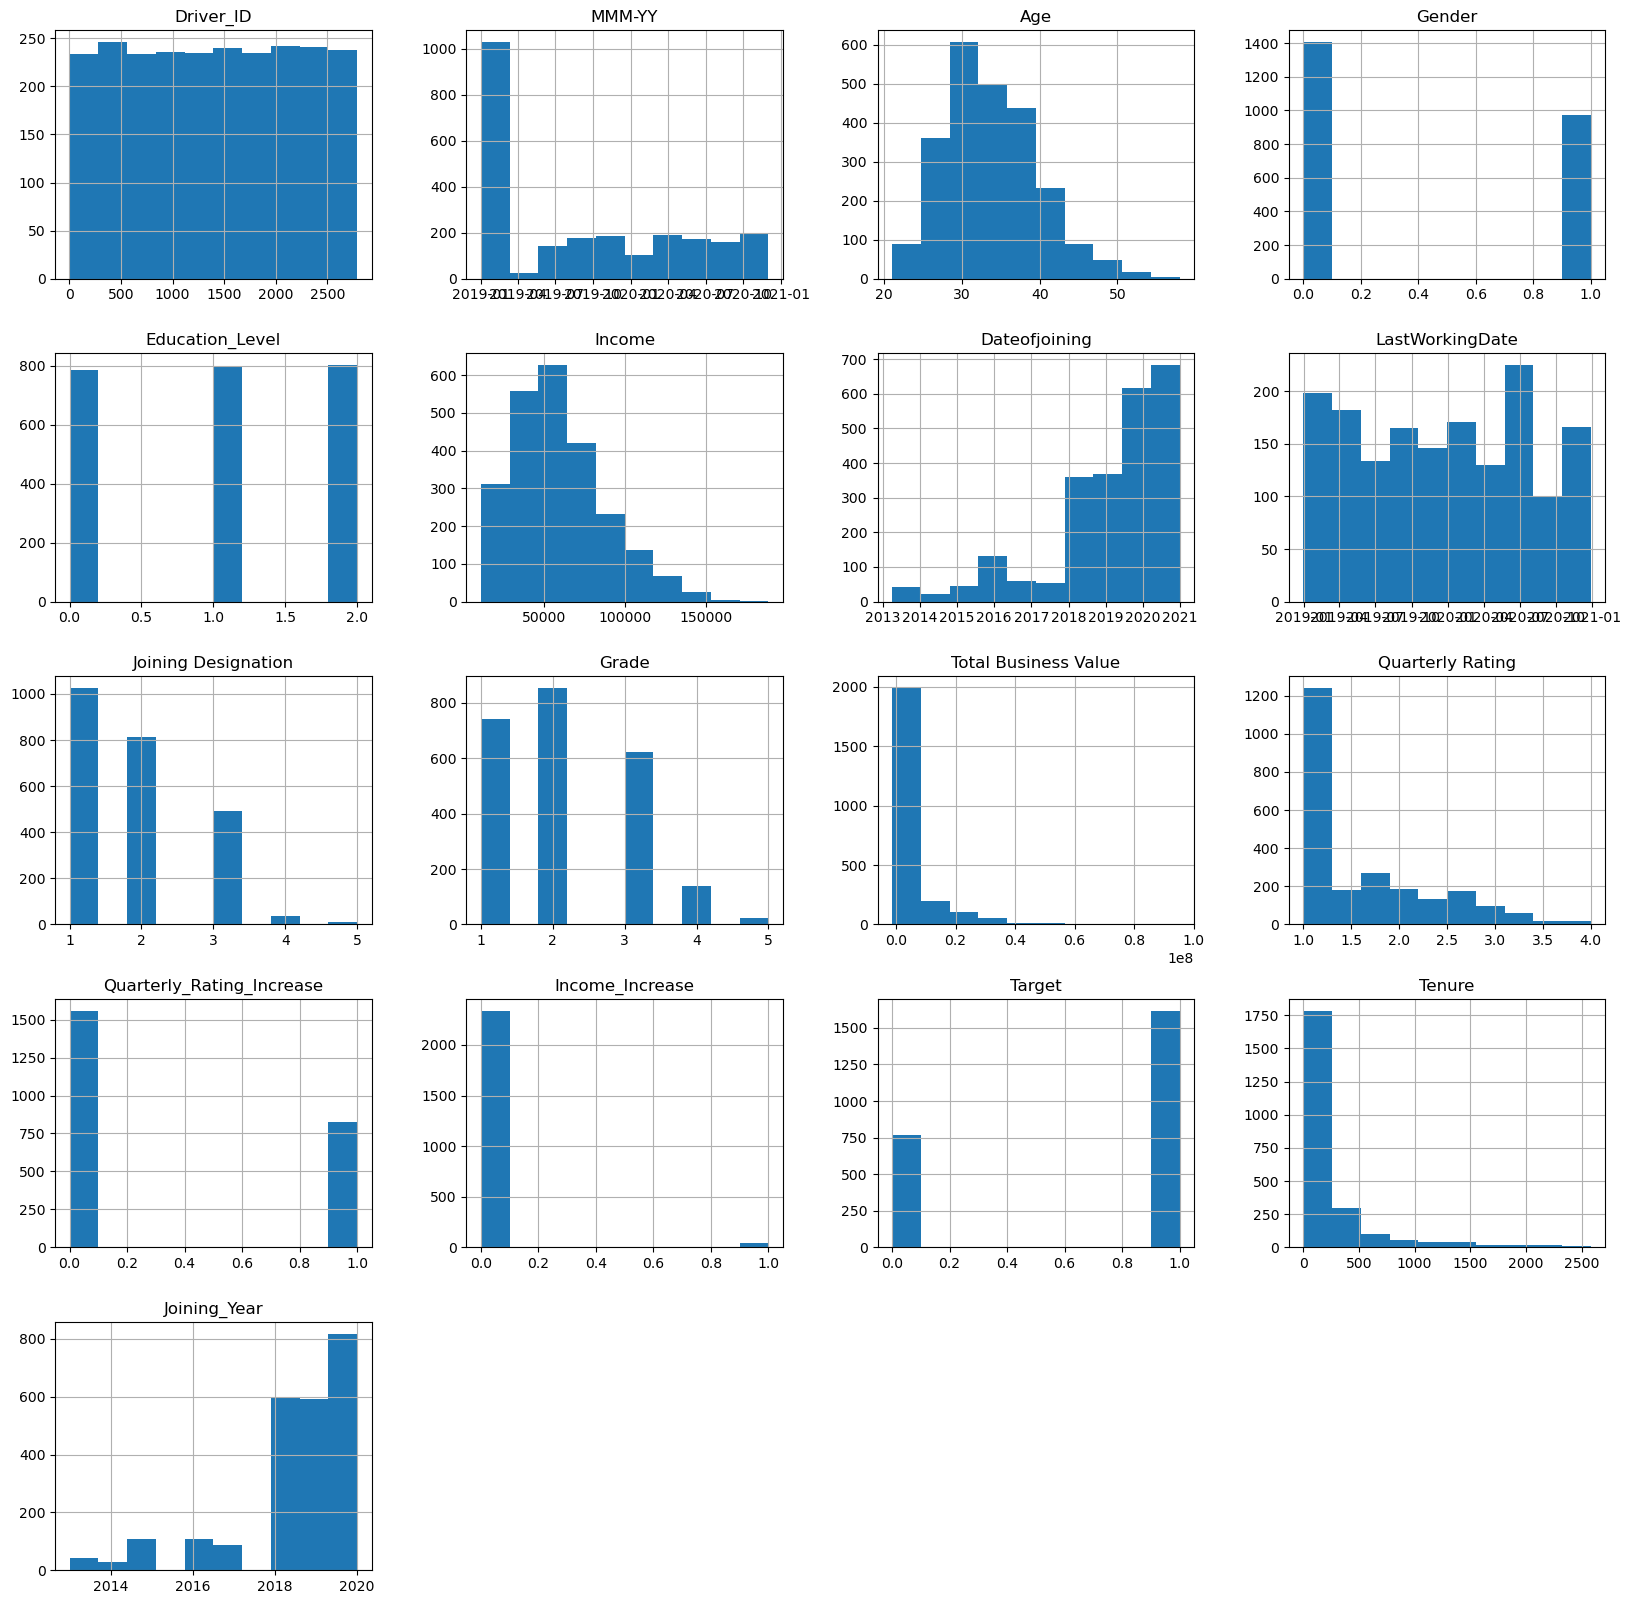

In [289]:
df_grouped.hist(figsize=(20,20))
plt.show()

## Dropping the columns 'MMM-YY', 'Dateofjoining' and 'LastWorkingDate'

In [290]:
df_final = df_grouped.drop(columns=['MMM-YY', 'Dateofjoining', 'LastWorkingDate'])

In [293]:
df_final.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Income_Increase,Target,Tenure,Joining_Year
0,1,28.0,0.0,C23,2,57387.0,1,1,1715580,2.0,0,0,1,77.0,2018
1,2,31.0,0.0,C7,2,67016.0,2,2,0,1.0,0,0,0,0.0,2020
2,4,43.0,0.0,C13,2,65603.0,2,2,350000,1.0,0,0,1,142.0,2019
3,5,29.0,0.0,C9,0,46368.0,1,1,120360,1.0,0,0,1,57.0,2019
4,6,31.0,1.0,C11,1,78728.0,3,3,1265000,1.6,1,0,0,0.0,2020


## Checking Correlation among columns/features

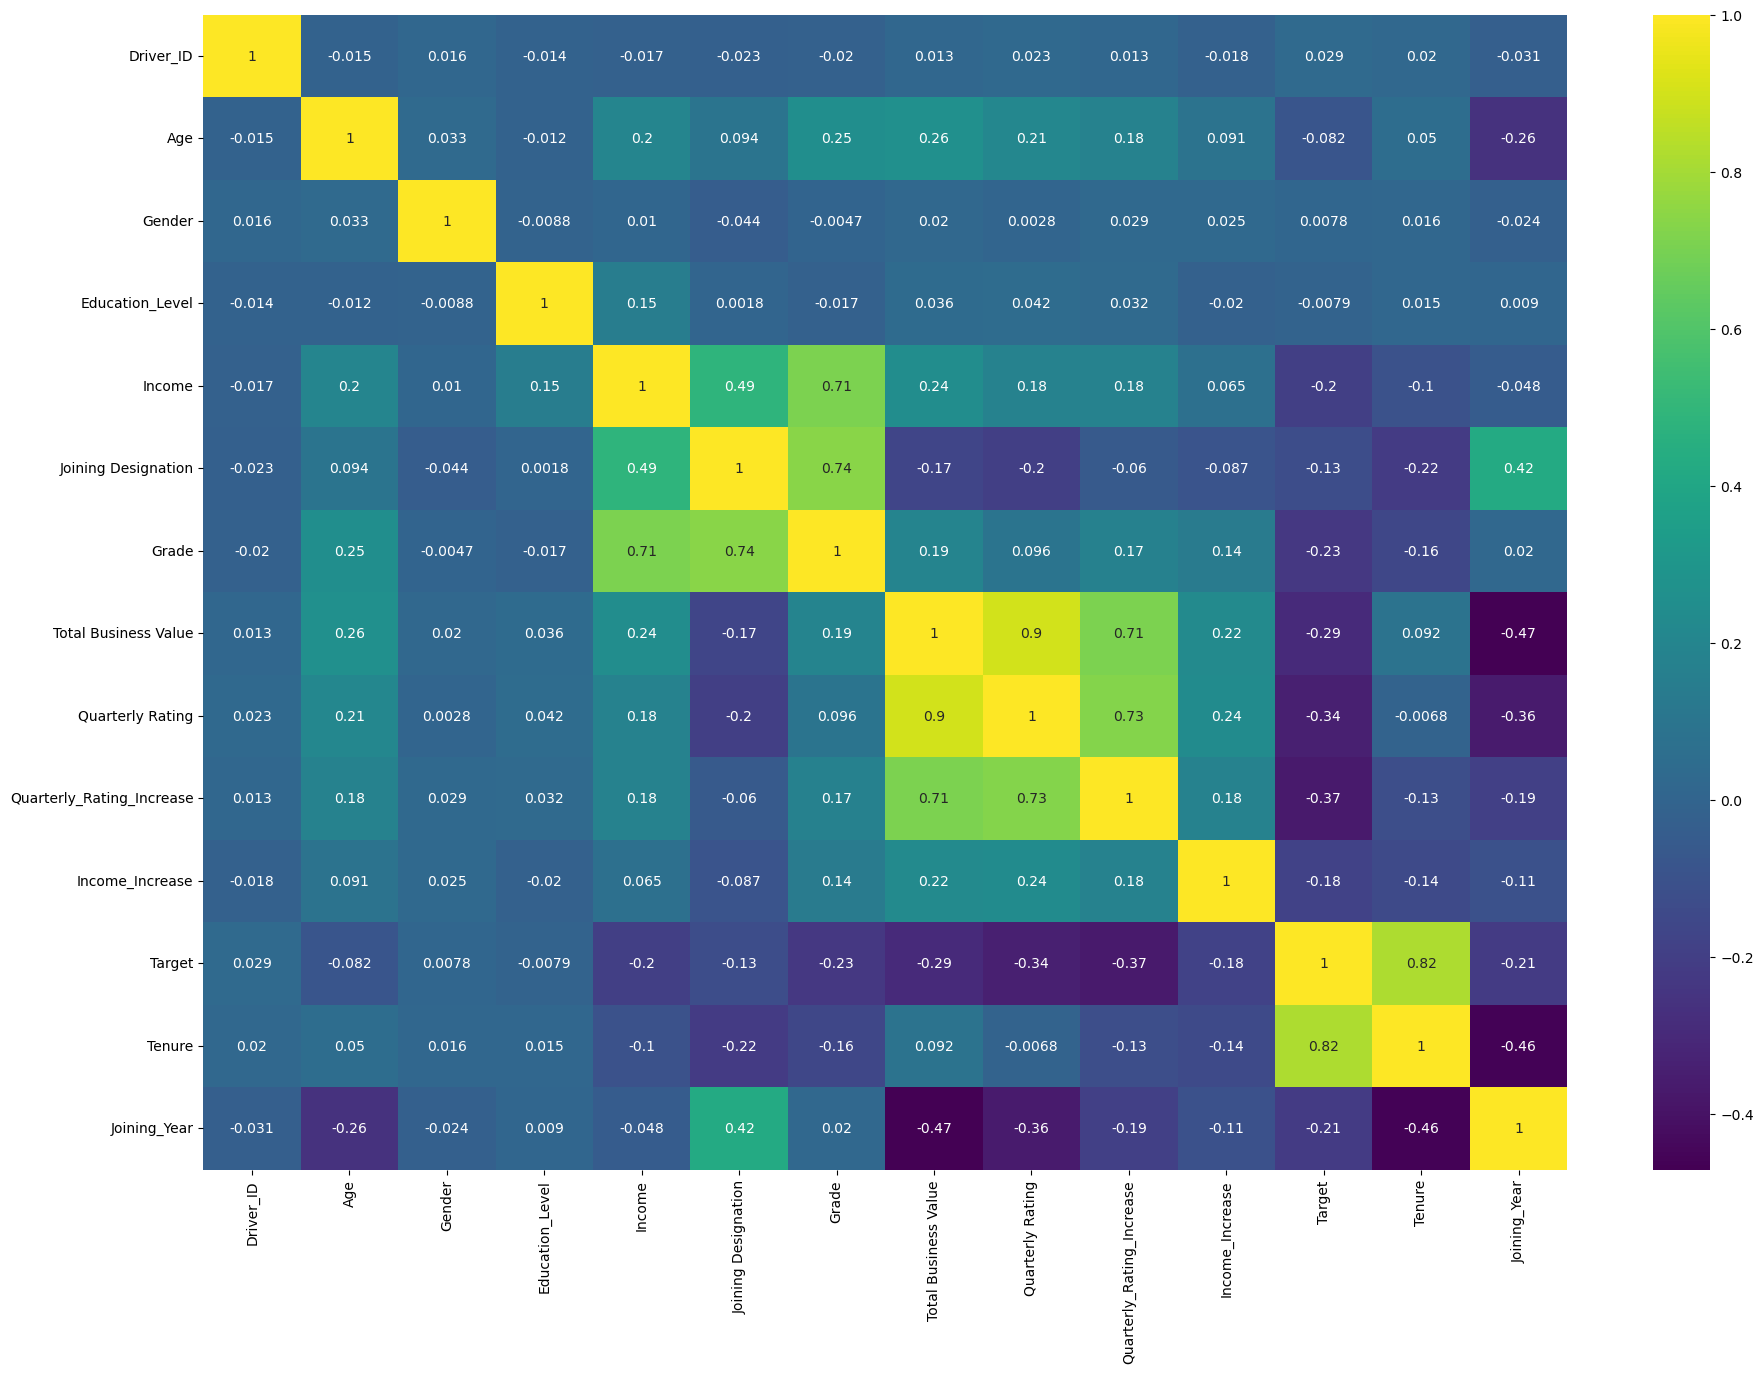

In [300]:
plt.figure(figsize=(22,15))
sns.heatmap(df_final.corr(method = 'spearman'), annot=True, cmap = 'viridis')
plt.show()

### The features 'Total Businees Value' and Quarterly Rating' are highly correlated. However, the correlation coefficient is not touching .95. So I am not dropping any of them.

In [297]:
df_final.isnull().sum()

Driver_ID                    0
Age                          0
Gender                       0
City                         0
Education_Level              0
Income                       0
Joining Designation          0
Grade                        0
Total Business Value         0
Quarterly Rating             0
Quarterly_Rating_Increase    0
Income_Increase              0
Target                       0
Tenure                       0
Joining_Year                 0
dtype: int64

# Bivariate/Multivariate Analysis

<AxesSubplot:xlabel='Grade', ylabel='Income'>

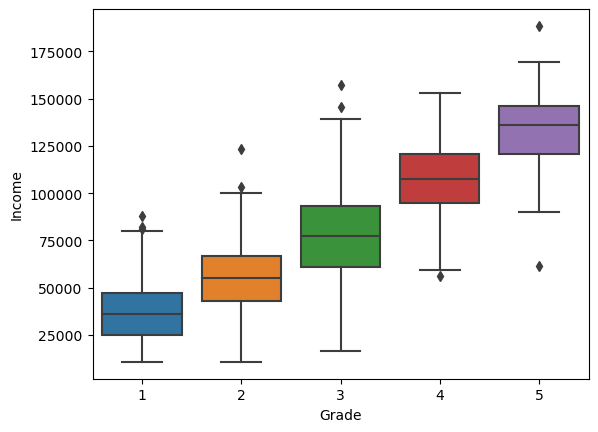

In [304]:
sns.boxplot(data=df_final, x='Grade', y='Income')

### Higher Grade resulting in higher Income

<AxesSubplot:xlabel='Target', ylabel='Income'>

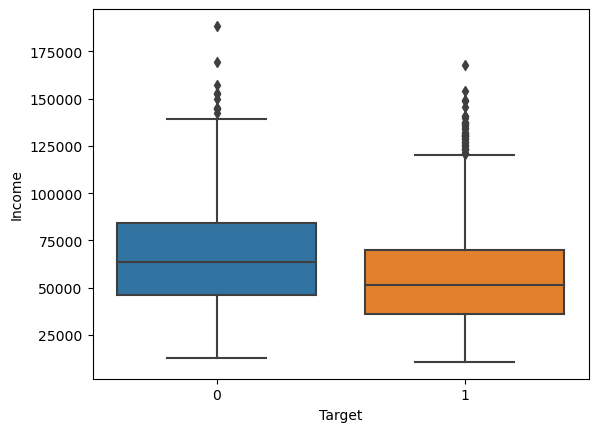

In [305]:
sns.boxplot(data=df_final, x='Target', y='Income')

<AxesSubplot:xlabel='Target', ylabel='Total Business Value'>

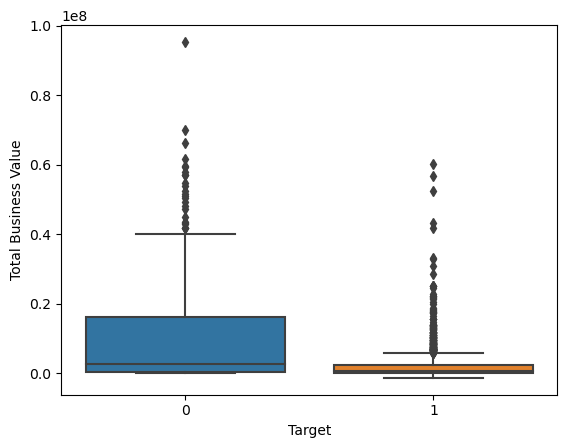

In [306]:
sns.boxplot(data=df_final, x='Target', y='Total Business Value')

## Although there are outliers in the columns 'Income' and 'Total Business Value' with respect to the Target variable, they seem useful in making the decision. Hence I am not dropping them

# Data Preprocessing
### Target Encding of the column 'City'

In [322]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder(cols = ['City'])

df_final['City'] = target_encoder.fit_transform(df_final['City'], df_final['Target'])

In [333]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Target', axis=1)
y = df_final['Target']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1904, 14), (1904,), (477, 14), (477,))

## SMOTE for Data Imbalance

In [340]:
from imblearn.over_sampling import SMOTE

print(f'Before SMOTE: \n{y_train.value_counts()}')
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print(f'After SMOTE: \n{y_sm.value_counts()}')

Before SMOTE: 
1    1299
0     605
Name: Target, dtype: int64
After SMOTE: 
1    1299
0    1299
Name: Target, dtype: int64


# 1st Ensemble technique: Randome Forest
### I will use either KFold or OOB score for verification as the dataset is not so large to take validation set from it

In [355]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [356]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=5)
cv_result = cross_validate(rf_clf, X_sm, y_sm, cv=kfold, scoring='accuracy', return_train_score=True)

In [357]:
cv_result

{'fit_time': array([0.3965292 , 0.38898087, 0.39028406, 0.33579922, 0.38596511]),
 'score_time': array([0.02846861, 0.0203011 , 0.02198792, 0.02038765, 0.021667  ]),
 'test_score': array([1.        , 1.        , 0.99807692, 0.99614644, 1.        ]),
 'train_score': array([0.9985563 , 0.9985563 , 0.99903754, 0.999519  , 0.998557  ])}

In [358]:
print(f"Accuracy Mean: \n Train: {cv_result['train_score'].mean()*100:.2f} \n Validation: {cv_result['test_score'].mean()*100:.2f}")
print(f"Accuracy Std: \n Train: {cv_result['train_score'].std()*100:.2f}, \n Validation: {cv_result['test_score'].std()*100:.2f}")


Accuracy Mean: 
 Train: 99.88 
 Validation: 99.88
Accuracy Std: 
 Train: 0.04, 
 Validation: 0.15


## Rf model is giving very good score already and it is generalized model with the given parameter. No overfit or underfit
#### There is no point of hyperparameter tuning in this case. Will try Boosting technique

In [362]:
# Feature Importance

rf_clf.fit(X_sm, y_sm)
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

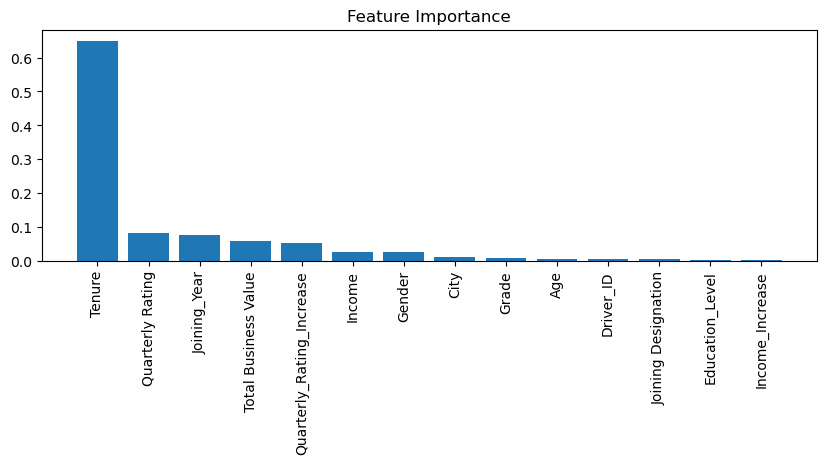

In [374]:
plt.figure(figsize=(10, 3)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Most important featrure according to the RF model can be seen through the graph

In [378]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, max_depth=2)

gbc.fit(X_sm, y_sm)

GradientBoostingClassifier(max_depth=2)

In [379]:
gbc.score(X_sm, y_sm)

1.0

In [380]:
gbc.score(X_test, y_test)

0.9958071278825996

### Boosting technique GBC is giving even better score, it is just a little overfit. There is no need for hyperparameter tuning so much

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Metrix')

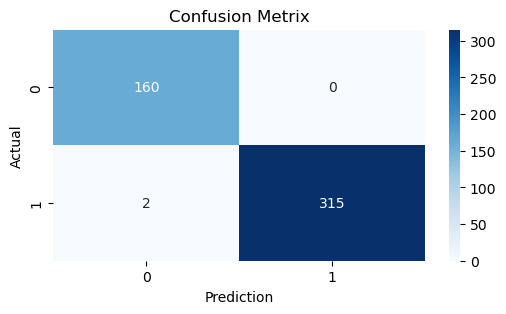

In [389]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, gbc.predict(X_test))

plt.figure(figsize=(6,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Metrix')

### Only 2 misclassified point for class 1 predicted as class 0

In [402]:
tn, fp, fn, tp = cm.ravel()

TPR = tp/(tp+fp)
FPR = fp/(fp+tn)
print(f'TPR : {TPR} \nFPR : {FPR}')

TPR : 1.0 
FPR : 0.0


# Classification Report

In [393]:
from sklearn.metrics import classification_report

report = classification_report(y_test, gbc.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       160
           1       1.00      0.99      1.00       317

    accuracy                           1.00       477
   macro avg       0.99      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477



## ROC Curve -
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

TPR=(TP)/(TP+FN)
False Positive Rate (FPR) is defined as follows:

FPR=(FP)/(FP+TN)
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

## AUC (Area under the ROC Curve) -
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

AUC_ROC_SOCRE : 0.9989156151419558


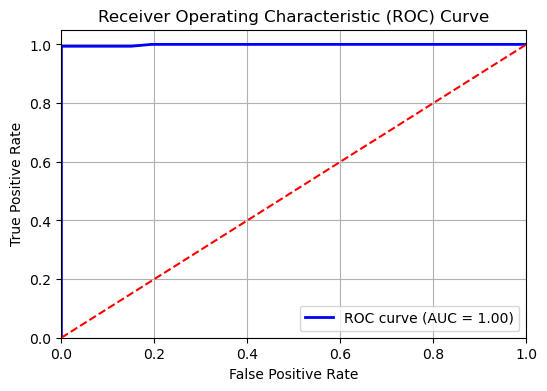

In [407]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = gbc.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUC_ROC_SOCRE : {auc_score}')

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

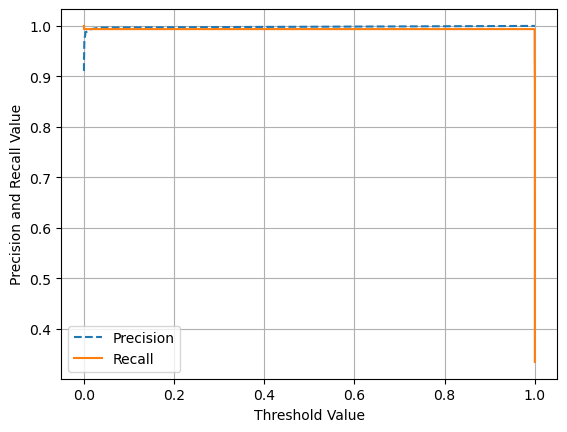

In [409]:
def precision_recall_curve_plot(y_test, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    plt.plot(thresholds, precision[:-1], linestyle='--', label='Precision')
    plt.plot(thresholds, recall[:-1], label='Recall')

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

# Assuming you have already trained your model and obtained y_scores
precision_recall_curve_plot(y_test, y_probs)


# Indights & Recommendation:

Based on the analysis conducted on the Ola driver dataset, here are some insights and recommendations:

### Data Preprocessing:

- Missing values were handled using KNN imputation for the 'Age' column and mode imputation for the 'Gender' column.
- Categorical encoding was performed on the 'City' column using target encoding to convert categorical values into numerical representations.
- Feature engineering was conducted to create new columns indicating increases in 'Quarterly Rating' and 'Monthly Income' for each driver.

### Exploratory Data Analysis (EDA):

- Box plots were used to visualize the distribution of 'Income' and 'Total Business Value' with respect to different categorical variables like 'Grade', 'Target', etc.
- Outlier detection and analysis were performed to understand the impact of outliers on the target variable.

### Modeling:

- Two ensemble techniques, Random Forest and Gradient Boosting Classifier, were trained and evaluated for predicting driver churn.
- Random Forest achieved good accuracy scores and showed no signs of overfitting or underfitting, making it a suitable model for prediction.
- Gradient Boosting Classifier provided even better accuracy scores, although it showed a slightly higher level of overfitting compared to Random Forest.

### Evaluation Metrics:

- Confusion matrix, precision, recall, ROC curve, and AUC score were used to evaluate the performance of the models.
- The ROC curve and AUC score indicated the effectiveness of the models in distinguishing between positive and negative classes.

## Recommendations:

- Further fine-tuning of the Gradient Boosting Classifier model parameters may help in reducing overfitting.
- Feature importance analysis revealed important features contributing to the prediction of driver churn. It's essential to understand these factors and take necessary actions to improve driver retention.
- Regular monitoring of driver performance metrics such as 'Total Business Value', 'Quarterly Rating', and 'Income' can help in identifying drivers at risk of churning.
- Implementing strategies to improve driver satisfaction, such as providing incentives, optimizing routes, and offering training programs, may help in reducing churn rates.
- Continuous data collection and analysis can provide valuable insights into evolving patterns and trends, allowing for timely adjustments to retention strategies.
- Overall, leveraging machine learning models and advanced analytics techniques can assist Ola in optimizing driver retention strategies and enhancing overall business performance.